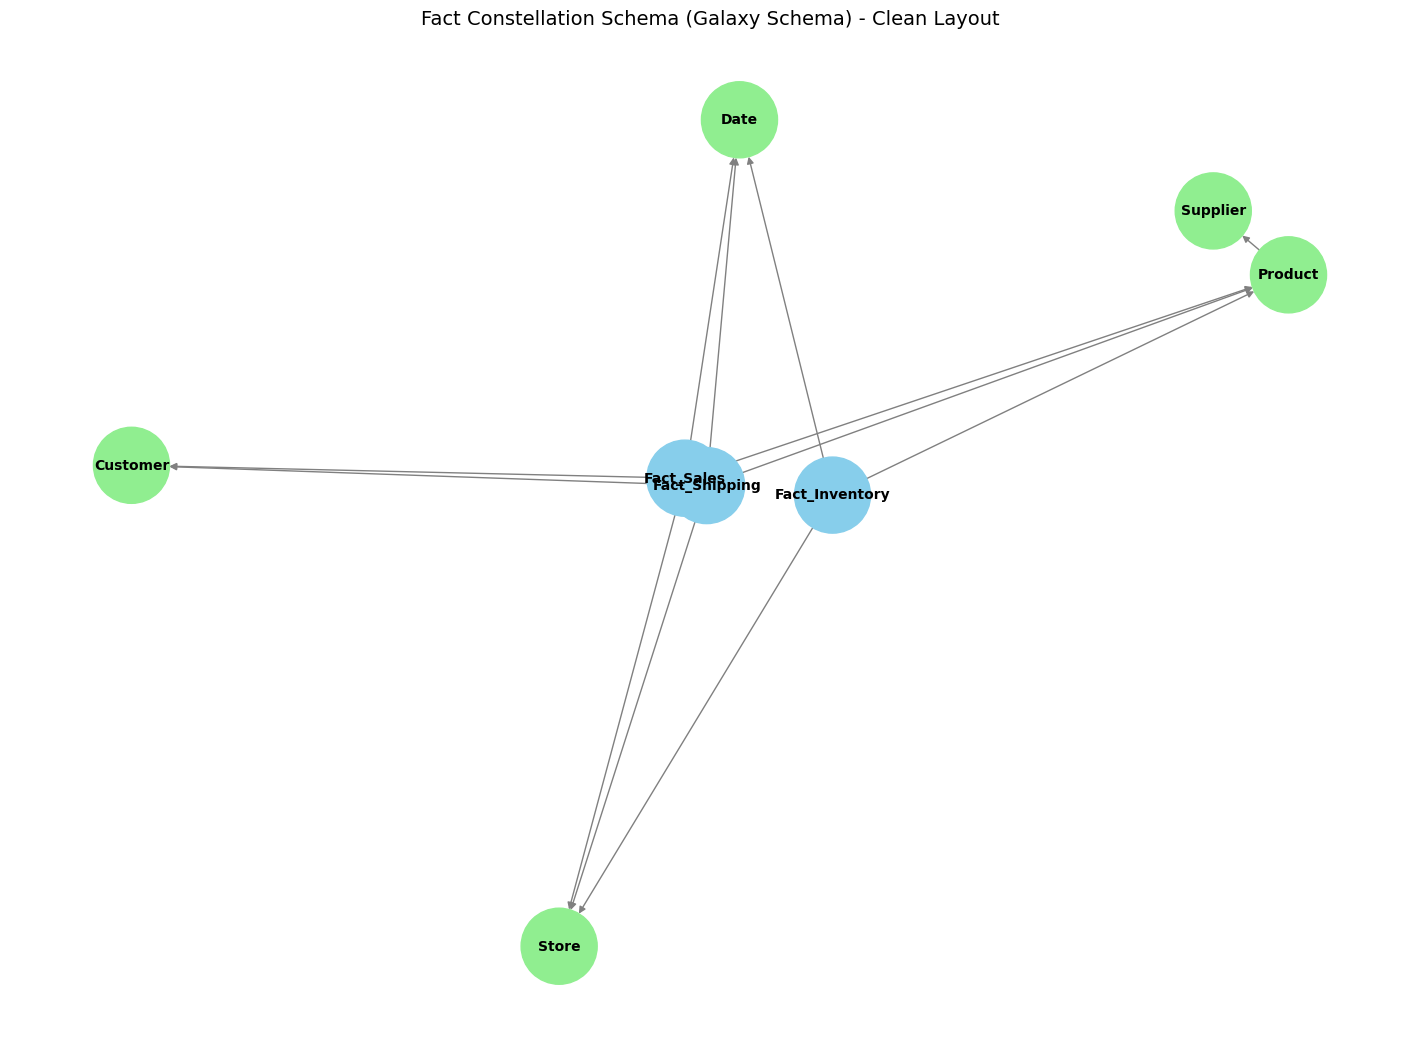

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Dimension Tables
dimensions = ["Date", "Product", "Store", "Customer", "Supplier"]

# Fact Tables
facts = ["Fact_Sales", "Fact_Inventory", "Fact_Shipping"]

# Add nodes and classify their type
for dim in dimensions:
    G.add_node(dim, type='dimension')
for fact in facts:
    G.add_node(fact, type='fact')

# Fact table relationships
fact_relationships = {
    "Fact_Sales": ["Date", "Product", "Store", "Customer"],
    "Fact_Inventory": ["Date", "Product", "Store"],
    "Fact_Shipping": ["Date", "Product", "Store", "Customer"]
}

# Connect facts to dimensions
for fact, dims in fact_relationships.items():
    for dim in dims:
        G.add_edge(fact, dim)

# Extra connection: Product -> Supplier
G.add_edge("Product", "Supplier")

# Use Graphviz layout for clean non-overlapping nodes
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Set node colors by type
colors = ['skyblue' if G.nodes[node]['type'] == 'fact' else 'lightgreen' for node in G.nodes]

# Draw the graph
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3000,
        font_size=10, font_weight='bold', edge_color='gray')
plt.title("Fact Constellation Schema (Galaxy Schema) - Clean Layout", fontsize=14)
plt.axis('off')

# Save the output
plt.savefig("fact_constellation_schema_non_overlapping.png")
plt.show()
